# Spotify Lyrics EDA Notebook

This notebook performs a **full exploratory data analysis (EDA)** on two datasets:
- `Top_Artists.csv`
- `Low_Artists.csv`

It includes:
1. Data loading & basic overview
2. Data cleaning
3. Numeric & categorical EDA
4. Lyrics-only NLP EDA
5. Top vs Low artists comparison

> **Note:** Place this notebook in the same folder as `Top_Artists.csv` and `Low_Artists.csv`.

In [1]:

# ==== 1. Imports & Settings ====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

# Optional NLP imports (only needed for stopwords)
try:
    import nltk
    from nltk.corpus import stopwords
    nltk.download('stopwords', quiet=True)
    STOPWORDS = set(stopwords.words('english'))
except Exception as e:
    print('NLTK stopwords not available. Proceeding without them.')
    STOPWORDS = set()

# Display options
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 100)


## 2. Load Data

In [2]:

# ==== 2. Load Data ====
# Assumes the CSV files are in the same folder as this notebook.
low_path = 'Low_Artists.csv'
top_path = 'Top_Artists.csv'

low_df = pd.read_csv(low_path)
top_df = pd.read_csv(top_path)

print('Low Artists shape:', low_df.shape)
print('Top Artists shape:', top_df.shape)

display(low_df.head())
display(top_df.head())


Low Artists shape: (1143, 9)
Top Artists shape: (1142, 9)


,SongName,AlbumName,AlbumLink,Year,PlayCount,Lyrics,SongLink,Duration,artist
0,$copie,$O$,https://open.spotify.com/album/7Ja0MmZhnVdFjs5QOPj1lj,2010,4606632,"I got what you want boy, I got what you want\nI got what you want boy, you never going to get it\nI got what you want boy, I got what you want\nNo you never going to get it, so you might as well f...",https://open.spotify.com/track/2rTjC1PYwenrBbAjBgxrfP,192,DieAntwoord
1,2•GOLDEN DAWN•7,2•GOLDEN DAWN•7,https://open.spotify.com/album/3kOlbclgj0GglpzBfUGS88,2018,6421323,"I've seen it all\nFace carved out of stone, unreadable\nPretty wise and ugly on the skin\nLovely from within\nBaby I love you\nAnd my love is true\nYou're my everything, I will do anything for you...",https://open.spotify.com/track/24JZqWlglnEfqYUZe2ugPm,289,DieAntwoord
2,Age Of Illusion,Age Of Illusion,https://open.spotify.com/album/56zia7byXUEiTcmKxcKQgU,2022,5273751,It's the Age of Illusion\nThe Age of Illusion\nEveryone is beautiful\nEverything is fine\nIn The Land of Illusion\nThe water babies speak Japanese\nAnd the faeries drink wine\nEveryone is beautifu...,https://open.spotify.com/track/5jjH6vi22zsOAV2l7ZjqZx,261,DieAntwoord
3,Alien,Mount Ninji And Da Nice Time Kid,https://open.spotify.com/album/4FrKhXf6FmfUjTy2fPcmiI,2016,17927575,"I am a alien\n♪\nNo matter how hard I try I don't fit in\nAlways all on my own,\nSad and lonely\nAll I want is for someone to play with me\nLong ago I was a little girl yeah I was never ever able ...",https://open.spotify.com/track/2P8wndZLW1QnByitJ0Clv2,256,DieAntwoord
4,Banana Brain,Mount Ninji And Da Nice Time Kid,https://open.spotify.com/album/4FrKhXf6FmfUjTy2fPcmiI,2016,94935971,Banana brains you're the apple of my eye\nStay with me tonight\nCause I'm having the best time of my life\nBanana brains you're the apple of my eye\nStay with me tonight\nCause I'm having the best...,https://open.spotify.com/track/6vcgMBMmbpQVj59wyLkvC7,288,DieAntwoord


,SongName,AlbumName,AlbumLink,Year,PlayCount,Lyrics,SongLink,Duration,artist
0,BIRDS OF A FEATHER,HIT ME HARD AND SOFT,https://open.spotify.com/album/7aJuG4TFXa2hmE4z1yxc3n,2024,3218891371,"('Til I'm in the grave)\r\nI want you to stay\r\n'Til I'm in the grave\r\n'Til I rot away, dead and buried\r\n'Til I'm in the casket you carry\r\nIf you go, I'm going too, uh\r\n'Cause it was alwa...",https://open.spotify.com/track/6dOtVTDdiauQNBQEDOtlAB,210,Billie_Ilish
1,you should see me in a crown,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",https://open.spotify.com/album/0S0KGZnfBGSIssfF54WSJh,2019,1000101010,"Bite my tongue, bide my time\r\nWearing a warning sign\r\nWait 'til the world is mine\r\nVisions I vandalize\r\nCold in my kingdom size\r\nFell for these ocean eyes\r\nYou should see me in a crown...",https://open.spotify.com/track/3XF5xLJHOQQRbWya6hBp7d,180,Billie_Ilish
2,GOLDWING,Happier Than Ever,https://open.spotify.com/album/0JGOiO34nwfUdDrD612dOp,2021,162632187,"He hath come to the bosom of his beloved\r\nSmiling on him, she beareth him to highest heav'n\r\nWith yearning heart\r\nOn thee we gaze\r\nO' gold-winged messenger of mighty Gods\r\n♪\r\n(Goldwing...",https://open.spotify.com/track/0FfqyjhB6Kspvit1oOo7ax,151,Billie_Ilish
3,Getting Older,Happier Than Ever,https://open.spotify.com/album/0JGOiO34nwfUdDrD612dOp,2021,334347982,"I'm getting older, I think I'm aging well\r\nI wish someone had told me I'd be doing this by myself\r\nThere's reasons that I'm thankful, there's a lot I'm grateful for\r\nBut it's different when ...",https://open.spotify.com/track/4HOryCnbme0zBnF8LWij3f,244,Billie_Ilish
4,Your Power,Happier Than Ever,https://open.spotify.com/album/0JGOiO34nwfUdDrD612dOp,2021,526977340,"Try not to abuse your power\r\nI know we didn't choose to change\r\nYou might not wanna lose your power\r\nBut havin' it's so strange\r\nShe said ""you were a hero, you played the part""\r\n""But you...",https://open.spotify.com/track/042Sl6Mn83JHyLEqdK7uI0,245,Billie_Ilish


## 3. Basic Overview & Structure

In [3]:

# ==== 3. Basic Overview & Structure ====
print('--- Low Artists Info ---')
display(low_df.info())
print('\n--- Top Artists Info ---')
display(top_df.info())

print('\n--- Low Artists Describe (Numeric) ---')
display(low_df.describe())

print('\n--- Top Artists Describe (Numeric) ---')
display(top_df.describe())

print('\n--- Low Artists Describe (Categorical) ---')
display(low_df.describe(include='object'))

print('\n--- Top Artists Describe (Categorical) ---')
display(top_df.describe(include='object'))


--- Low Artists Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SongName   1143 non-null   object
 1   AlbumName  1143 non-null   object
 2   AlbumLink  1143 non-null   object
 3   Year       1143 non-null   int64 
 4   PlayCount  1143 non-null   int64 
 5   Lyrics     1143 non-null   object
 6   SongLink   1143 non-null   object
 7   Duration   1143 non-null   int64 
 8   artist     1143 non-null   object
dtypes: int64(3), object(6)
memory usage: 80.5+ KB


None


--- Top Artists Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SongName   1142 non-null   object
 1   AlbumName  1142 non-null   object
 2   AlbumLink  1142 non-null   object
 3   Year       1142 non-null   int64 
 4   PlayCount  1142 non-null   int64 
 5   Lyrics     1142 non-null   object
 6   SongLink   1142 non-null   object
 7   Duration   1142 non-null   int64 
 8   artist     1142 non-null   object
dtypes: int64(3), object(6)
memory usage: 80.4+ KB


None


--- Low Artists Describe (Numeric) ---


,Year,PlayCount,Duration
count,1143.000000,1.143000e+03,1143.000000
mean,2006.415573,1.196272e+07,213.013123
std,19.039033,5.856181e+07,73.397562
min,1964.000000,0.000000e+00,9.000000
25%,1997.000000,3.756360e+05,170.000000
50%,2015.000000,1.995004e+06,209.000000
75%,2020.000000,6.198323e+06,247.000000
max,2025.000000,1.054761e+09,910.000000



--- Top Artists Describe (Numeric) ---


,Year,PlayCount,Duration
count,1142.000000,1.142000e+03,1142.000000
mean,2018.774956,3.044943e+08,228.025394
std,5.109936,5.293032e+08,70.321275
min,2005.000000,8.398000e+03,13.000000
25%,2015.000000,4.666995e+07,191.000000
50%,2021.000000,1.200105e+08,223.000000
75%,2023.000000,3.115149e+08,261.000000
max,2025.000000,5.139139e+09,727.000000



--- Low Artists Describe (Categorical) ---


,SongName,AlbumName,AlbumLink,Lyrics,SongLink,artist
count,1143,1143,1143,1143,1143,1143
unique,1082,208,213,1143,1093,22
top,Stay,If You Don't Like the Story Write Your Own,https://open.spotify.com/album/4dR2U031e2XkziQH53khB9,"I got what you want boy, I got what you want\nI got what you want boy, you never going to get it\nI got what you want boy, I got what you want\nNo you never going to get it, so you might as well f...",https://open.spotify.com/track/2fnwiUU3LEvEy7xByzzaDV,thehollies
freq,3,27,27,1,2,218



--- Top Artists Describe (Categorical) ---


,SongName,AlbumName,AlbumLink,Lyrics,SongLink,artist
count,1142,1142,1142,1142,1142,1142
unique,1128,101,102,1136,1142,12
top,Farewell,Music To Be Murdered By - Side B (Deluxe Edition),https://open.spotify.com/album/3MKvhQoFSrR2PrxXXBHe9B,Can't take it back once it's been set in motion\r\n♪\r\nYou know I love to rub it in like lotion\r\nIf you only pray on Sunday\r\nCould you come my way on Monday?\r\n'Cause I like to do things God...,https://open.spotify.com/track/6dOtVTDdiauQNBQEDOtlAB,Kanye_West
freq,2,30,30,2,1,135


## 4. Data Cleaning
We will:
- Standardize column names
- Strip whitespace
- Drop exact duplicate rows
- Remove rows with missing lyrics
- (Optional) Filter to English-looking lyrics using a simple heuristic (A–Z characters).

In [4]:

# ==== 4. Data Cleaning ====

def clean_column_names(df):
    df = df.copy()
    df.columns = [c.strip().replace(' ', '_').lower() for c in df.columns]
    return df

def basic_text_clean(text: str) -> str:
    if not isinstance(text, str):
        return ''
    # Lowercase and strip
    text = text.lower().strip()
    # Replace line breaks
    text = text.replace('\r', ' ').replace('\n', ' ')
    return text

def english_heuristic_filter(df, lyrics_col='lyrics', min_alpha_ratio=0.5):
    """Very rough heuristic: keep rows where >= min_alpha_ratio of characters are basic Latin letters/spaces."""
    def is_englishish(text):
        if not isinstance(text, str) or len(text) == 0:
            return False
        allowed = set('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ \'".,!?;:-')
        total = len(text)
        if total == 0:
            return False
        alpha_count = sum(1 for ch in text if ch in allowed)
        return (alpha_count / total) >= min_alpha_ratio

    mask = df[lyrics_col].astype(str).apply(is_englishish)
    return df[mask].copy()

# 4.1 Standardize column names
low_df = clean_column_names(low_df)
top_df = clean_column_names(top_df)

print('Columns after cleaning:')
print('Low:', low_df.columns.tolist())
print('Top:', top_df.columns.tolist())

# 4.2 Strip whitespace from string columns
for df in (low_df, top_df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype(str).str.strip()

# 4.3 Drop exact duplicate rows
low_df_before = low_df.shape[0]
top_df_before = top_df.shape[0]

low_df = low_df.drop_duplicates()
top_df = top_df.drop_duplicates()

print('Dropped duplicates:')
print('Low:', low_df_before - low_df.shape[0])
print('Top:', top_df_before - top_df.shape[0])

# 4.4 Drop rows with missing lyrics
for df_name, df in [('Low', low_df), ('Top', top_df)]:
    if 'lyrics' in df.columns:
        before = df.shape[0]
        df.dropna(subset=['lyrics'], inplace=True)
        after = df.shape[0]
        print(f'{df_name}: dropped {before - after} rows with missing lyrics')

# 4.5 Basic text clean on lyrics
if 'lyrics' in low_df.columns:
    low_df['lyrics_clean'] = low_df['lyrics'].apply(basic_text_clean)
if 'lyrics' in top_df.columns:
    top_df['lyrics_clean'] = top_df['lyrics'].apply(basic_text_clean)

# 4.6 Optional: English-only heuristic filter (set to False if you don't want this)
FILTER_TO_ENGLISH = True

if FILTER_TO_ENGLISH:
    if 'lyrics_clean' in low_df.columns:
        low_df = english_heuristic_filter(low_df, lyrics_col='lyrics_clean')
    if 'lyrics_clean' in top_df.columns:
        top_df = english_heuristic_filter(top_df, lyrics_col='lyrics_clean')

print('\nFinal shapes after cleaning:')
print('Low:', low_df.shape)
print('Top:', top_df.shape)


Columns after cleaning:
Low: ['songname', 'albumname', 'albumlink', 'year', 'playcount', 'lyrics', 'songlink', 'duration', 'artist']
Top: ['songname', 'albumname', 'albumlink', 'year', 'playcount', 'lyrics', 'songlink', 'duration', 'artist']
Dropped duplicates:
Low: 0
Top: 0
Low: dropped 0 rows with missing lyrics
Top: dropped 0 rows with missing lyrics

Final shapes after cleaning:
Low: (1143, 10)
Top: (1142, 10)


## 5. Numeric & Categorical EDA

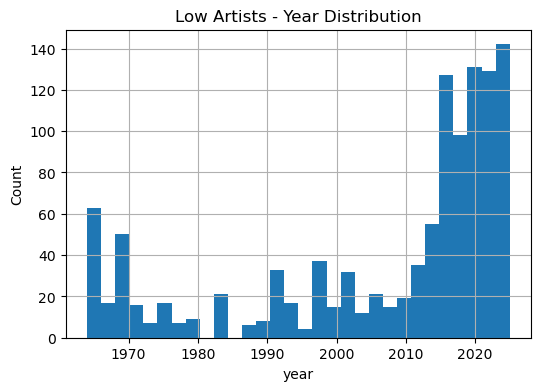

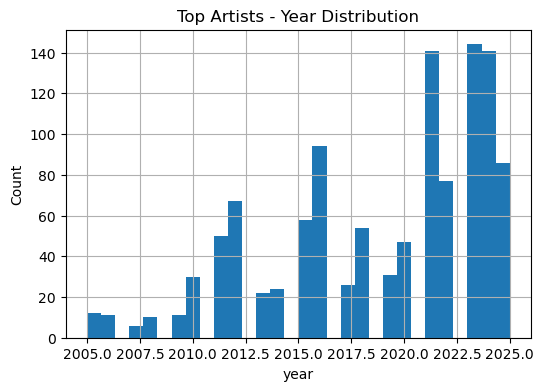

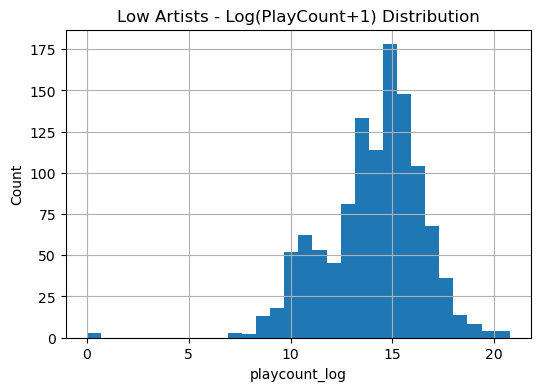

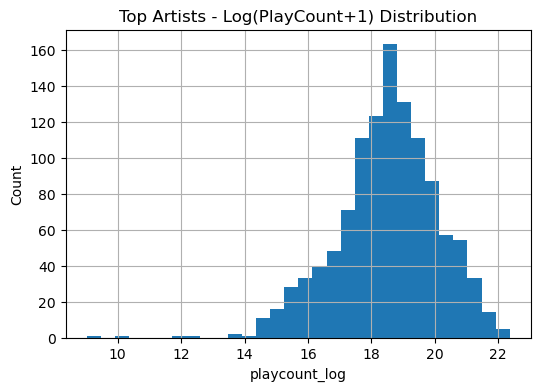

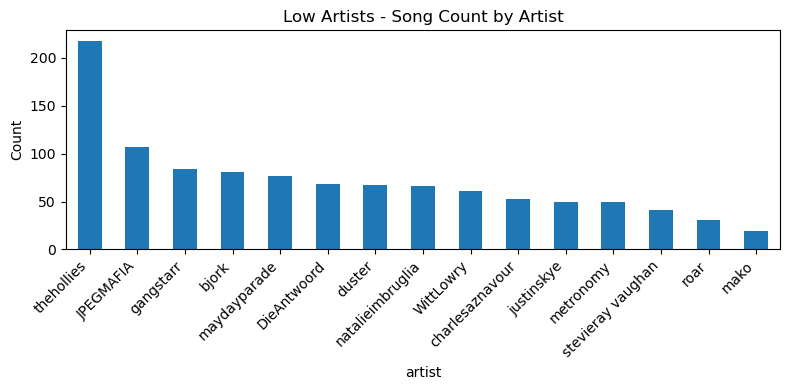

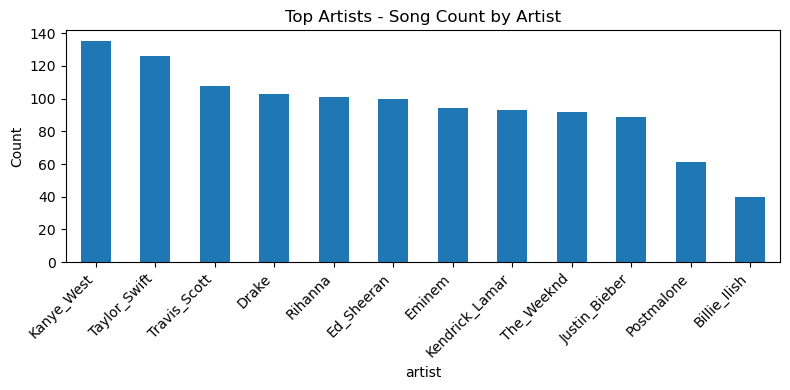

In [5]:

# ==== 5. Numeric & Categorical EDA ====

def plot_hist(df, col, title):
    if col not in df.columns:
        print(f'Column {col} not in dataframe.')
        return
    plt.figure(figsize=(6,4))
    df[col].dropna().hist(bins=30)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

def plot_bar_counts(df, col, title, top_n=15):
    if col not in df.columns:
        print(f'Column {col} not in dataframe.')
        return
    counts = df[col].value_counts().head(top_n)
    plt.figure(figsize=(8,4))
    counts.plot(kind='bar')
    plt.title(title)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Year distribution
for name, df in [('Low', low_df), ('Top', top_df)]:
    if 'year' in df.columns:
        plot_hist(df, 'year', f'{name} Artists - Year Distribution')

# PlayCount distribution (log-scale friendly view)
for name, df in [('Low', low_df), ('Top', top_df)]:
    if 'playcount' in df.columns:
        df['playcount_log'] = np.log1p(df['playcount'])
        plot_hist(df, 'playcount_log', f'{name} Artists - Log(PlayCount+1) Distribution')

# Artist song counts
for name, df in [('Low', low_df), ('Top', top_df)]:
    if 'artist' in df.columns:
        plot_bar_counts(df, 'artist', f'{name} Artists - Song Count by Artist')


## 6. Lyrics-only NLP EDA


Low - Word Count Stats:


count    1143.000000
mean      311.898513
std       218.235208
min         5.000000
25%       161.500000
50%       248.000000
75%       401.000000
max      1628.000000
Name: word_count, dtype: float64

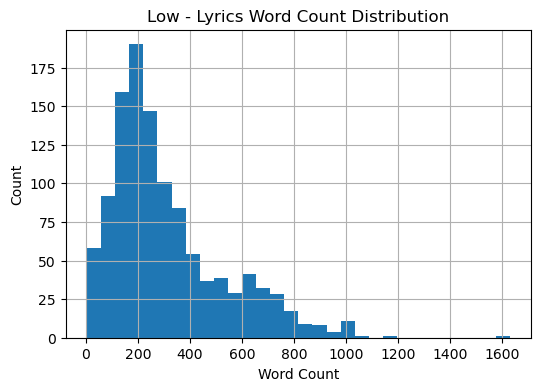


Top - Word Count Stats:


count    1142.000000
mean      460.436953
std       243.021653
min        12.000000
25%       295.250000
50%       412.500000
75%       581.000000
max      2133.000000
Name: word_count, dtype: float64

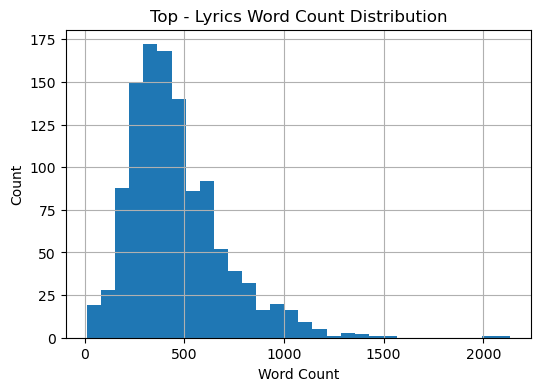


Low - Top Words:
like: 2651
know: 2332
love: 1739
get: 1427
got: 1415
never: 1280
see: 1093
can't: 1088
one: 1021
want: 984
time: 979
wanna: 968
make: 955
'cause: 849
back: 826
let: 804
say: 799
feel: 798
need: 796
take: 754
fuck: 750
way: 734
tell: 730
come: 727
think: 714
you,: 709
ain't: 698
could: 682
me,: 673
right: 649

Top - Top Words:
like: 3987
know: 3451
got: 2702
love: 2427
get: 2391
yeah,: 1808
ain't: 1729
'cause: 1585
never: 1455
wanna: 1382
yeah: 1377
can't: 1349
one: 1274
back: 1263
oh,: 1263
me,: 1261
take: 1248
want: 1241
see: 1234
let: 1234
time: 1227
need: 1223
make: 1222
feel: 1141
that's: 1109
say: 1085
come: 1082
it,: 1077
shit: 1021
tell: 992

Low - Top TF-IDF Terms:
like: 0.1301
don: 0.1182
know: 0.1123
love: 0.1062
ll: 0.0933
just: 0.0933
oh: 0.0807
yeah: 0.0732
time: 0.0723
got: 0.0716
ve: 0.0687
let: 0.0653
cause: 0.0637
want: 0.0613
way: 0.0603
make: 0.0582
come: 0.0576
say: 0.0570
baby: 0.0563
feel: 0.0546
fuck: 0.0525
wanna: 0.0520
need: 0.0507
life: 0.04

In [6]:

# ==== 6. Lyrics-only NLP EDA ====

def get_word_count(text):
    if not isinstance(text, str):
        return 0
    return len(text.split())

for name, df in [('Low', low_df), ('Top', top_df)]:
    if 'lyrics_clean' in df.columns:
        df['word_count'] = df['lyrics_clean'].apply(get_word_count)
        print(f'\n{name} - Word Count Stats:')
        display(df['word_count'].describe())

        plt.figure(figsize=(6,4))
        df['word_count'].hist(bins=30)
        plt.title(f'{name} - Lyrics Word Count Distribution')
        plt.xlabel('Word Count')
        plt.ylabel('Count')
        plt.show()

# Most frequent words (very simple tokenizer)
def get_top_words(corpus, top_k=30):
    from collections import Counter
    counter = Counter()
    for text in corpus:
        if not isinstance(text, str):
            continue
        tokens = [t for t in text.split() if t not in STOPWORDS and len(t) > 2]
        counter.update(tokens)
    return counter.most_common(top_k)

for name, df in [('Low', low_df), ('Top', top_df)]:
    if 'lyrics_clean' in df.columns:
        top_words = get_top_words(df['lyrics_clean'])
        print(f'\n{name} - Top Words:')
        for w, c in top_words:
            print(f'{w}: {c}')

# TF-IDF Overview
# We'll build a small TF-IDF matrix and inspect top terms overall.
def tfidf_top_terms(texts, max_features=50):
    vec = TfidfVectorizer(
        max_features=max_features,
        stop_words='english'
    )
    X = vec.fit_transform(texts)
    terms = vec.get_feature_names_out()
    # average tf-idf per term
    mean_scores = np.asarray(X.mean(axis=0)).ravel()
    term_scores = sorted(
        list(zip(terms, mean_scores)), key=lambda x: x[1], reverse=True
    )
    return term_scores

for name, df in [('Low', low_df), ('Top', top_df)]:
    if 'lyrics_clean' in df.columns:
        print(f'\n{name} - Top TF-IDF Terms:')
        terms = tfidf_top_terms(df['lyrics_clean'])
        for term, score in terms[:30]:
            print(f'{term}: {score:.4f}')


## 7. Top vs Low Artists Comparison

Combined shape: (2285, 13)


,year,artist,albumlink,tier,lyrics_clean,albumname,lyrics,playcount,word_count,songlink,songname,duration,playcount_log
0,2010,DieAntwoord,https://open.spotify.com/album/7Ja0MmZhnVdFjs5QOPj1lj,low,"i got what you want boy, i got what you want i got what you want boy, you never going to get it i got what you want boy, i got what you want no you never going to get it, so you might as well forg...",$O$,"I got what you want boy, I got what you want\nI got what you want boy, you never going to get it\nI got what you want boy, I got what you want\nNo you never going to get it, so you might as well f...",4606632,514,https://open.spotify.com/track/2rTjC1PYwenrBbAjBgxrfP,$copie,192,15.343008
1,2018,DieAntwoord,https://open.spotify.com/album/3kOlbclgj0GglpzBfUGS88,low,"i've seen it all face carved out of stone, unreadable pretty wise and ugly on the skin lovely from within baby i love you and my love is true you're my everything, i will do anything for you i wou...",2•GOLDEN DAWN•7,"I've seen it all\nFace carved out of stone, unreadable\nPretty wise and ugly on the skin\nLovely from within\nBaby I love you\nAnd my love is true\nYou're my everything, I will do anything for you...",6421323,600,https://open.spotify.com/track/24JZqWlglnEfqYUZe2ugPm,2•GOLDEN DAWN•7,289,15.675135
2,2022,DieAntwoord,https://open.spotify.com/album/56zia7byXUEiTcmKxcKQgU,low,it's the age of illusion the age of illusion everyone is beautiful everything is fine in the land of illusion the water babies speak japanese and the faeries drink wine everyone is beautiful every...,Age Of Illusion,It's the Age of Illusion\nThe Age of Illusion\nEveryone is beautiful\nEverything is fine\nIn The Land of Illusion\nThe water babies speak Japanese\nAnd the faeries drink wine\nEveryone is beautifu...,5273751,133,https://open.spotify.com/track/5jjH6vi22zsOAV2l7ZjqZx,Age Of Illusion,261,15.478253
3,2016,DieAntwoord,https://open.spotify.com/album/4FrKhXf6FmfUjTy2fPcmiI,low,"i am a alien ♪ no matter how hard i try i don't fit in always all on my own, sad and lonely all i want is for someone to play with me long ago i was a little girl yeah i was never ever able to fit...",Mount Ninji And Da Nice Time Kid,"I am a alien\n♪\nNo matter how hard I try I don't fit in\nAlways all on my own,\nSad and lonely\nAll I want is for someone to play with me\nLong ago I was a little girl yeah I was never ever able ...",17927575,446,https://open.spotify.com/track/2P8wndZLW1QnByitJ0Clv2,Alien,256,16.701851
4,2016,DieAntwoord,https://open.spotify.com/album/4FrKhXf6FmfUjTy2fPcmiI,low,banana brains you're the apple of my eye stay with me tonight cause i'm having the best time of my life banana brains you're the apple of my eye stay with me tonight cause i'm having the best time...,Mount Ninji And Da Nice Time Kid,Banana brains you're the apple of my eye\nStay with me tonight\nCause I'm having the best time of my life\nBanana brains you're the apple of my eye\nStay with me tonight\nCause I'm having the best...,94935971,540,https://open.spotify.com/track/6vcgMBMmbpQVj59wyLkvC7,Banana Brain,288,18.368713



Numeric columns used for comparison: ['playcount', 'word_count', 'year']


playcount                                                                \
         count          mean           std     min          25%          50%   
tier                                                                           
low     1143.0  1.196272e+07  5.856181e+07     0.0    375636.00    1995004.0   
top     1142.0  3.044943e+08  5.293032e+08  8398.0  46669945.75  120010514.0   

                                word_count              ...                 \
              75%           max      count        mean  ...    75%     max   
tier                                                    ...                  
low     6198323.0  1.054761e+09     1143.0  311.898513  ...  401.0  1628.0   
top   311514920.5  5.139139e+09     1142.0  460.436953  ...  581.0  2133.0   

        year                                                                  
       count         mean        std     min     25%     50%     75%     max  
tier                                                                          
low   1143.0  2006.415573  19.039033  1964.0  1997.0  2015.0  2020.0  2025.0  
top   1142.0  2018.774956   5.109936  2005.0  2015.0  2021.0  2023.0  2025.0  

[2 rows x 24 columns]

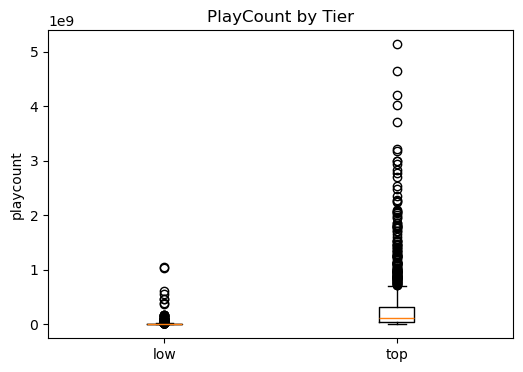

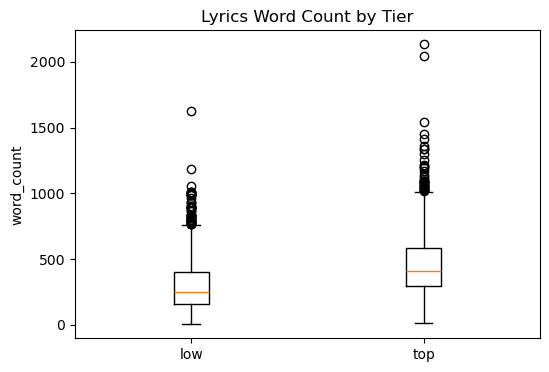


TF-IDF comparison by tier:

Tier: low
like: 0.1127
don: 0.1023
know: 0.0980
love: 0.0921
just: 0.0802
ll: 0.0788
oh: 0.0709
yeah: 0.0628
got: 0.0622
time: 0.0610
ve: 0.0589
let: 0.0572
cause: 0.0558
want: 0.0543
way: 0.0530
come: 0.0509
baby: 0.0500
make: 0.0491
say: 0.0487
feel: 0.0475
wanna: 0.0467
fuck: 0.0456
need: 0.0448
tell: 0.0413
life: 0.0403

Tier: top
yeah: 0.1281
like: 0.1168
don: 0.1111
oh: 0.1084
know: 0.1073
love: 0.0951
just: 0.0912
got: 0.0805
ll: 0.0673
baby: 0.0668
cause: 0.0635
let: 0.0600
ooh: 0.0595
time: 0.0586
ain: 0.0578
wanna: 0.0546
shit: 0.0539
say: 0.0528
want: 0.0515
feel: 0.0512
need: 0.0502
life: 0.0502
way: 0.0491
ve: 0.0476
make: 0.0476


In [7]:

# ==== 7. Top vs Low Artists Comparison ====

# Add a 'tier' column to each dataframe and concatenate
low_df['tier'] = 'low'
top_df['tier'] = 'top'

common_cols = list(set(low_df.columns).intersection(set(top_df.columns)))
combined_df = pd.concat(
    [low_df[common_cols], top_df[common_cols]], ignore_index=True
)

print('Combined shape:', combined_df.shape)
display(combined_df.head())

# 7.1 Compare numeric stats (PlayCount, WordCount)
numeric_cols = []
for col in ['playcount', 'word_count', 'year']:
    if col in combined_df.columns:
        numeric_cols.append(col)

print('\nNumeric columns used for comparison:', numeric_cols)
display(combined_df.groupby('tier')[numeric_cols].describe())

# 7.2 Boxplots for playcount and word_count by tier
def boxplot_by_tier(df, col, title):
    if col not in df.columns:
        print(f'Column {col} not present.')
        return
    plt.figure(figsize=(6,4))
    data_to_plot = [df[df['tier']=='low'][col].dropna(), df[df['tier']=='top'][col].dropna()]
    plt.boxplot(data_to_plot, labels=['low', 'top'])
    plt.title(title)
    plt.ylabel(col)
    plt.show()

if 'playcount' in combined_df.columns:
    boxplot_by_tier(combined_df, 'playcount', 'PlayCount by Tier')

if 'word_count' in combined_df.columns:
    boxplot_by_tier(combined_df, 'word_count', 'Lyrics Word Count by Tier')

# 7.3 TF-IDF comparison between tiers
if 'lyrics_clean' in combined_df.columns:
    print('\nTF-IDF comparison by tier:')

    for tier in ['low', 'top']:
        tier_texts = combined_df.loc[combined_df['tier'] == tier, 'lyrics_clean']
        print(f'\nTier: {tier}')
        terms = tfidf_top_terms(tier_texts, max_features=80)
        for term, score in terms[:25]:
            print(f'{term}: {score:.4f}')


## 8. Summary & Next Steps
- Use the above sections to explore structure, distributions, and lyrical patterns.
- You can extend this notebook by:
  - Adding sentiment analysis
  - Running topic modeling (LDA)
  - Building classification models to distinguish Top vs Low based on lyrics.